# Prueba Hito 1(Parte I)
Autor: Pablo Veloz M.

Desafío 1: Determinantes del ingreso

__Enunciado:__

Usted trabaja para un  organismo no  gubernamental que está interesado en  las  dinámicassocioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema,enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las NacionesUnidas para el  Desarrollo.
Le  encomiendan el  desarrollo de  un  modelo predictivo  sobre laprobabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en basea una serie de atributos sociodemográficos.

__Descripción de la base de datos__
Para desarrollar este desafío se debe utilizar la base de datos income-db.csv .
Las variables que componen esta base se detallan a continuación:
- `age` : Edad del individuo.
- `workclass` : Naturaleza de la organización que emplea al individuo.
- `education` : Nivel educacional del individuo:Bachelors (Licenciado), Some-college (Superior
incompleta), 11th (3ro medio), HS-grad (Secundaria completa), Prof-school (Escuela
profesional), Assoc-acdm (Técnico superior administrativo) , Assoc-voc (Técnico superior
vocacional), 9th (1ro medio), 7th-8th (7mo-8vo), 12th (4to medio), Masters (Maestría de
postgrado), 1st-4th (1ro-4to básico), 10th(2do medio), Doctorate (Doctorado), 5th-6th (5to-6to),
Preschool (Preescolar).
- `capital-gains` : Ingresos generados por inversiones fuera del trabajo asalariado = Ingresos
generados por inversiones fuera del trabajo asalariado.
- `capital-losses` : Pérdidas generadas por inversiones fuera del trabajo asalariado.
- `fnlwgt` : Ponderador muestral.
- `marital-status` : Estado civil del individuo: Married-civ-spouse (Casado/a régimen civil),
Divorced (Divorciado/a), Never-married (Soltero/a), Separated (Separado/a), Widowed (Viudo/a),
Married-spouse-absent (Casado con esposo/a ausente), Married-AF-spouse (Casado/a régimen
castrense).
- `occupation` : Ocupación del individuo: Tech-support (Soporte técnico), Craft-repair
(Reparaciones), Other-service (Otros servicios), Sales (Ventas), Exec-managerial (Ejecutivo
administrativos), Prof-specialty (Profesores), Handlers-cleaners (Aseo y ornato), Machine-op-
inspct (Inspectores de maquinarias), Adm-clerical (Administrativos servicio al cliente), Farming-
fishing (Pesca-ganadería), Transport-moving (Transporte), Priv-house-serv (Asesor del hogar),
Protective-serv (servicios de seguridad), Armed-Forces (Fuerzas armadas).
- `relationship` : Relación respecto a su familia Wife(Esposa), Own-child (hijo único), Husband
(Esposo), Not-in-family (No pertenece a la familia), Other-relative (Familiar de otro tipo),
Unmarried (Soltero).
- `race` : Raza del encuestado White(Blanco caucásico), Asian-Pac-Islander (Isleño del Asia
Pacífico), Amer-Indian-Eskimo (Pertenenciente a pueblos originarios), Other (Otro grupo), Black
(Afroamericano).
- `sex` : Sexo del encuestado.hours-per-week : Cantidad de horas trabajadas por semana.
- `native-country`: País de origen. United-States, Cambodia, England, Puerto-Rico, Canada,
Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran,
Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,
Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-
Netherlands.
- `income` : <=50K Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, >50K si
el individuo percibe ingresos superiores a 50.000 dólares anuales. Este es su vector objetivo.

# __Objetivo:__
- __Desarrollar un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.__

   * __Completar el punto de Preliminares, así como Aspectos computacionales.__
       * Elementos a considerar:
        *  Los dos enunciados deben estar clarificados, considerando el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema. (3 puntos)
        * Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (1 punto) 
        * Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (1 punto)
    * Se debe considerar el uso de las librerías asociadas para la ingesta, preprocesamiento, visualización y modelación, así como métricas de evaluación. (1 punto) 
    -Importe las libreria, para la ingesta de preprocesamiento:

In [87]:
import pandas as pd
import numpy as np

## __Aspecto Preliminar:__

In [88]:
df = pd.read_csv("income-db.csv")
df.shape

(48842, 15)

In [89]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [90]:
print("Cantidad de columnas del dataframe: ",len(df.columns))

Cantidad de columnas del dataframe:  15


A partir de lo anterior, podemos fijar como varible objetivo a __income__. Es decir, determinar el ingreso de una persona si es superior o inferior a 50k. A partir de esto, se verá la importancia y el peso de cada variable del dataframe en __income__, y poder señalar si con ciertas condiciones, tendrá un ingreso superior o inferior a __50K__.

In [91]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

__Variable Objetivo__:<font color='red'>income</font>

Inspeccionando los __tipos__ de variable de nuestro dataframe, y fijandonos en la variable variable objetivo __income__

In [92]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

La variable __income__ se reconoce en Pandas como Object, es decir, en términos nativos de python sería tipo String, y en términos estadísticos sería categórica

In [93]:
pd.DataFrame({'Pandas':'Object','Python':'String','Estadistica':'Categórica'}, index=[0])

,Pandas,Python,Estadistica
0,Object,String,Categórica


- Inspeccionando la variable y poder asignar un modelo de estudio ya sea __Clasificación__ o __Regresión__.
- Los modelos de clasificación confirman que una un vector objetivo responde a un atributo discreto. Esto se confirma cuando aplicamos el método __value_counts()__ sobre la variable objetivo.
- Por lo tanto, nuestro estudio se enmarcará en esclarecer un problema de __clasificación binaria__
- Entonces, para la  visualización y modelación se importarán las siguientes librerias:

## Módulos básicos para las métricas y el análisis de datos:
* import `matplotlib.pyplot` as `plt`
    - Se ocupara para plottear relaciones entre variables en 2D.
* Import `seaborn`
    - Se ocupará para visualizar relaciones, si bien se basa en mathplotlib posee una alternativa más atractiva e informativa para las graficas.
* Import `statsmodels`
    - Es una libreria que se ocupará para la estimación del modelo en virtud de nuestra variable objetivo `income`.
* Import `sklearn`
    -  La ocuparemos para el data analisis de las predicciones.
* Import `linear_model LogisticRegression`
    - La ocuparemos para reproducir un modelo lineal de la variable `income`
* from sklearn `train_test_split`
    - Obtendremos una division de los datos, para entrenar y testear.
* from sklearn `preprocessing StandardScaler`
* Import `classification_report` from classification report `roc_curve`
    - Métricas para poder evaluar nuestro modelo predictivo.

* Detalle de los pasos a seguir:
    * ## Análisis Exploratorio.
        * Depurar nan, y valores que generen cierto "error" en la lectura y metricas.
        * Uso de boxplots y barplot si corresponde a un atributo númerico o categórico respectivamente.
        * Mapa de correlación
    * ## Modelación Económetrica.
        * Binarización de variables categóricas. En los casos:
             * `Education:` Básica_Media y Universitaria
             * `Race:` White y no_white
             * `Worklass:` Private, Gov y Otros
             * `marital-Status`: Marrid y no_Married
             * `Gender`: male  y female
    * ## Entrenar Modelo.
    * ## Validación a partir de las Métricas obtenidos.

# Prueba Hito 2 Income(Parte II)
Autor: Pablo Veloz M.

# __Objetivo__
* ## Completar el punto de Descripción.
    * ### Elementos a considerar
        * La inspección visual del vector objetivo. (2 puntos)
        * La inspección visual de las variables. (2 puntos)
        * La inspección de datos perdidos en las variables. (1 punto)
        * De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables

In [94]:
import pandas as pd
import numpy as np

## __Aspecto Preliminar:__

In [95]:
df = pd.read_csv("income-db.csv")
df.shape

(48842, 15)

In [96]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Podemos observar que el dataframe, cuenta con datos en variadas columnas y filas como __?__. Inicialmente, contaremos cuantos de ellos hay en cada columna.

In [97]:
for i,n in enumerate(df.columns):
    print("***************************************")
    print(n,df[df[n]=="?"][n].value_counts())
#print(df[df['workclass']=="?"]['workclass'].value_counts()[0])



***************************************
age Series([], Name: age, dtype: int64)
***************************************
workclass ?    2799
Name: workclass, dtype: int64
***************************************
fnlwgt Series([], Name: fnlwgt, dtype: int64)
***************************************
education Series([], Name: education, dtype: int64)
***************************************
educational-num Series([], Name: educational-num, dtype: int64)
***************************************
marital-status Series([], Name: marital-status, dtype: int64)
***************************************
occupation ?    2809
Name: occupation, dtype: int64
***************************************
relationship Series([], Name: relationship, dtype: int64)
***************************************
race Series([], Name: race, dtype: int64)
***************************************
gender Series([], Name: gender, dtype: int64)
***************************************
capital-gain Series([], Name: capital-gain, dtyp

/home/proveloz/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### Las columnas afectadas con __?__ en el dataframe corresponden a: 
* ["workclass", "occupation","native-country"]

### Crearemos una variable df2, que guarde el cambio de los datos __?__ a NaN.

In [98]:
df2 = pd.read_csv('income-db.csv', na_values=["?"])


In [99]:
df2.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Recodificar Variables:
- occupation: collars
    - white-collar:Prof-specialty, Exec-managerial, Adm-clerical, Sales,Tech-support.
    - blue-collar: raft-repair, Machine-op-inspct, Transport-moving.
    - others: Other-service, Armed-Forces
- workclass: workclass_recod
    - federal-gov:Federal-gov.
    - state-level-gov:State-gov, Local-gov.
    - self-employed:Self-emp-inc, Self-emp-not-inc
    - unemployed:Never-worked, Without-pay.
- education:educ_recod
    - preschool: Preschool
    - elementary-school:1st-4th, 5th-6th
    - high-school:7th-8th, 9th, 10th,11th, 12th, HS-grad
    - college:Assoc-voc, Assoc-acdm, Some-college
    - university:Bachelors, Masters, Prof-school, Doctorate
- marital-status: civstatus
    - married:Married-civ-spouse, Married-spouse-absent, Married-AF-spouse
    - divorced: Divorced
    - separated: Separated
    - widowed: Widowed.
- native-country: region donde cada país debe asignarse a uno de los 5 continentes.
- income debe recodificarse de forma binaria.

## Por Conveniencia en el Análisis Exploratorio, se realizará un cambio de nombre en las columnas cuyo separador es `-` por `_`.

In [100]:
df2=df2.rename(columns = {'educational-num':'educational_num',
                          'workclass':'workclass_recod',
                          'education':'educ_recod',
                          'occupation':'collars',
                          'marital-status':'civstatus',
                         'capital-gain':'capital_gain',
                          'capital-loss':'capital_loss',
                         'hours-per-week':'hours_per_week',
                         'native-country':'region'})

In [101]:
df2=df2.dropna()
df2.head(10)

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,capital_gain,capital_loss,hours_per_week,region,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [102]:
df2["collars"].value_counts()

Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: collars, dtype: int64

## `Collars`

In [103]:
dict_whitecollar = {"white-collar":"whitecollar","Prof-specialty":"whitecollar","Exec-managerial":"whitecollar","Adm-clerical":"whitecollar","Sales":"whitecollar","Tech-support":"whitecollar"}
dict_bluecollar = {"blue-collar":"bluecollar","Craft-repair":"bluecollar","Machine-op-inspct":"bluecollar","Transport-moving":"bluecollar","Handlers-cleaners":"bluecollar","Farming-fishing":"bluecollar","Protective-serv":"bluecollar","Priv-house-serv":"bluecollar"}
dict_others = {"Other-service":"others","Armed-Forces":"others"}

diccionario_reemplazar_2 = dict(**dict_whitecollar,**dict_bluecollar,**dict_others)
df2["collars"].replace(diccionario_reemplazar_2,inplace=True)
df2["collars"].value_counts()

whitecollar    24360
bluecollar     16040
others          4822
Name: collars, dtype: int64

In [104]:
df2["workclass_recod"].value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass_recod, dtype: int64

## `workclass_recod`

In [105]:
dict_federal = {"Federal-gov":"federalgov","federal-gov":"federalgov"}
dict_statelevel_gov = {"state-level-gov":"statelevelgov","State-gov":"statelevelgov","Local-gov":"statelevelgov"}
dict_selfemployed = {"self-employed":"selfemployed","Self-emp-inc":"selfemployed","Self-emp-not-inc":"selfemployed"}
dict_unemployed = {"Never-worked":"unemployed","Without-pay":"unemployed"}
diccionario_reemplazar_2 = dict(**dict_federal,**dict_statelevel_gov,**dict_selfemployed,**dict_unemployed)
df2["workclass_recod"].replace(diccionario_reemplazar_2,inplace=True)
df2["workclass_recod"].value_counts()

Private          33307
selfemployed      5442
statelevelgov     5046
federalgov        1406
unemployed          21
Name: workclass_recod, dtype: int64

## `civstatus`

In [106]:
dict_married = {"Married-civ-spouse":"married","Married-spouse-absent":"married","Married-AF-spouse":"married"}
dict_divorced = {"Divorced":"divorced"}
dict_separated = {"Separated":"separated"}
dict_widowed = {"Widowed":"widowed"}
dict_never_married = {"Never-married":"nevermarried","never_married":"nevermarried"}
diccionario_reemplazar_3 = dict(**dict_married,**dict_never_married,**dict_divorced,**dict_separated,**dict_widowed)
df2["civstatus"].replace(diccionario_reemplazar_3,inplace=True)
df2["civstatus"].value_counts()

married         21639
nevermarried    14598
divorced         6297
separated        1411
widowed          1277
Name: civstatus, dtype: int64

## `region`

In [107]:
america_array = ["america"]*17
asia_array = ["asia"]*11
europa_array = ["europa"]*12
dict_america = ["Cuba","Mexico","United-States","Canada","El-Salvador","Dominican-Republic","Jamaica",
                "Nicaragua","Peru","Ecuador","Trinadad&Tobago","Outlying-US(Guam-USVI-etc)","Honduras","Puerto-Rico","Guatemala","Haiti","Columbia"]
dict_asia = ["Philippines","India","China",'Vietnam','Taiwan','Iran','Thailand','Hong','Cambodia','Laos',"Japan"]
dict_europa = ["Germany",'England','Italy','Poland','Portugal','Greece','France', 'Ireland','Yugoslavia', 'Scotland','Hungary', 'Holand-Netherlands']
replace_dict_america = dict(zip(dict_america,america_array))
replace_dict_asia = dict(zip(dict_asia,asia_array))
replace_dict_europa = dict(zip(dict_europa, europa_array))
diccionario_reemplazar_4 = dict(**replace_dict_america,**replace_dict_asia,**replace_dict_europa)
df2["region"].replace(diccionario_reemplazar_4,inplace=True)

In [108]:
df2["region"].value_counts()

america    43453
asia         930
europa       738
South        101
Name: region, dtype: int64

## `Educational`

In [109]:
dict_preschool = {"Preschool":"preschool"}
dict_elementary_school = {"elementary-school":"elementaryschool","1st-4th":"elementaryschool","5th-6th":"elementaryschool"}
dict_high_school = {"high-school":"highschool","7th-8th":"highschool","9th":"highschool","10th":"highschool","11th":"highschool","12th":"highschool","HS-grad":"highschool"}
dict_college= {"Assoc-voc":"college","Assoc-acdm":"college","Some-college":"college"}
dict_university={"Bachelors":"university","Masters":"university","Prof-school":"university","Doctorate":"university"}
diccionario_reemplazar_2 = dict(**dict_preschool,**dict_elementary_school,**dict_high_school,**dict_college,**dict_university)
df2["educ_recod"].replace(diccionario_reemplazar_2,inplace=True)
df2["educ_recod"].value_counts()

highschool          19701
college             13365
university          11413
elementaryschool      671
preschool              72
Name: educ_recod, dtype: int64

## `Relationship`

In [110]:
df2["relationship"].value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [111]:
dict_notinfamily= {"Not-in-family":"notinfamily"}
dict_ownchild = {"Own-child":"ownchild"}
dict_otherrelative = {"Other-relative":"otherrelative"}

diccionario_reemplazar_2 = dict(**dict_notinfamily,**dict_ownchild,**dict_otherrelative)
df2["relationship"].replace(diccionario_reemplazar_2,inplace=True)
df2["relationship"].value_counts()

Husband          18666
notinfamily      11702
ownchild          6626
Unmarried         4788
Wife              2091
otherrelative     1349
Name: relationship, dtype: int64

## `Race`

In [112]:
df2["race"].value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [113]:
dict_other= {"Asian-Pac-Islander":"Other","Amer-Indian-Eskimo":"Other"}

diccionario_reemplazar_2 = dict(**dict_other)
df2["race"].replace(diccionario_reemplazar_2,inplace=True)
df2["race"].value_counts()

White    38903
Black     4228
Other     2091
Name: race, dtype: int64

In [114]:
df2.isna().sum()

age                0
workclass_recod    0
fnlwgt             0
educ_recod         0
educational_num    0
civstatus          0
collars            0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
region             0
income             0
dtype: int64

### Con esto depuramos el DataFrame y generamos columnas sin datos __?__. 

In [115]:
df2.head()

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,capital_gain,capital_loss,hours_per_week,region,income
0,25,Private,226802,highschool,7,nevermarried,bluecollar,ownchild,Black,Male,0,0,40,america,<=50K
1,38,Private,89814,highschool,9,married,bluecollar,Husband,White,Male,0,0,50,america,<=50K
2,28,statelevelgov,336951,college,12,married,bluecollar,Husband,White,Male,0,0,40,america,>50K
3,44,Private,160323,college,10,married,bluecollar,Husband,Black,Male,7688,0,40,america,>50K
5,34,Private,198693,highschool,6,nevermarried,others,notinfamily,White,Male,0,0,30,america,<=50K


# __Analisis Descriptivo__

## __Inspección Visual de las Variables__

In [116]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


A partir del __hito 1__:
* Se determinó que:
    - Uso de boxplots y barplot si corresponde a un atributo númerico o categórico respectivamente.

In [117]:
df2.dtypes

age                 int64
workclass_recod    object
fnlwgt              int64
educ_recod         object
educational_num     int64
civstatus          object
collars            object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
region             object
income             object
dtype: object

### __Graficando variables numéricas:__
    - Las variables de tipo int64 se realizará un boxplot y las variables de tipo object se realizará un gráfico plot.bar() 
* Con ello, podemos esclarecer la relación que existe el peso de las variables y sus clases sobre `income` 


In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

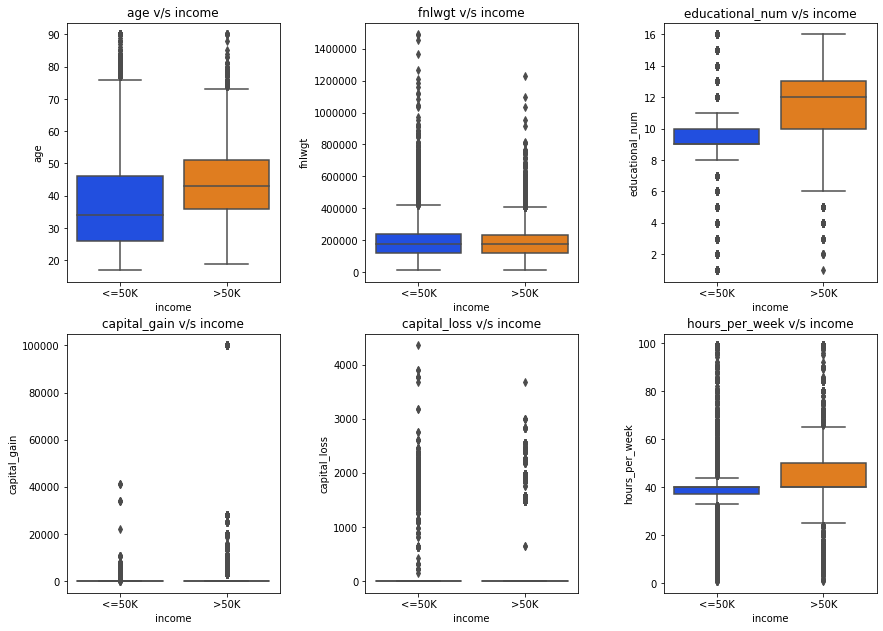

In [119]:
def income_num(dataframe):
    var=["age","fnlwgt","educational_num","capital_gain","capital_loss","hours_per_week"]
    fig = plt.figure()
    plt.subplots_adjust(wspace=0.4,right = 2.0,bottom = -1.1)
    
    for i,n in enumerate(var):
        plt.subplot(2,3,i+1)
        sns.boxplot(dataframe["income"],df2[n])
        plt.title(n+" v/s"+" income")
        sns.set_palette("bright")
income_num(df2)

- Se observa que la relación de las variables `capital-gain` y `capital-loss` versus `income` generan el diagama de cajón con Mediana $(M_{e}= 0)$. Más bien, se determina una cantidad de outlayer en estas variables cuando se relacionan con __income__. Este hecho, puede sugerir no considerarlas en un posterior estudio.
- Para `"fnlwgt"` ambas binarizaciones para `income` muestran valores similares. Esto podría significar que la variable no genere una diferencia en la variable objetivo.

In [120]:
df["fnlwgt"].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

### Graficando doble `plot.bar` parra las variables Categóricas, respecto a la vector objetivo `income`:


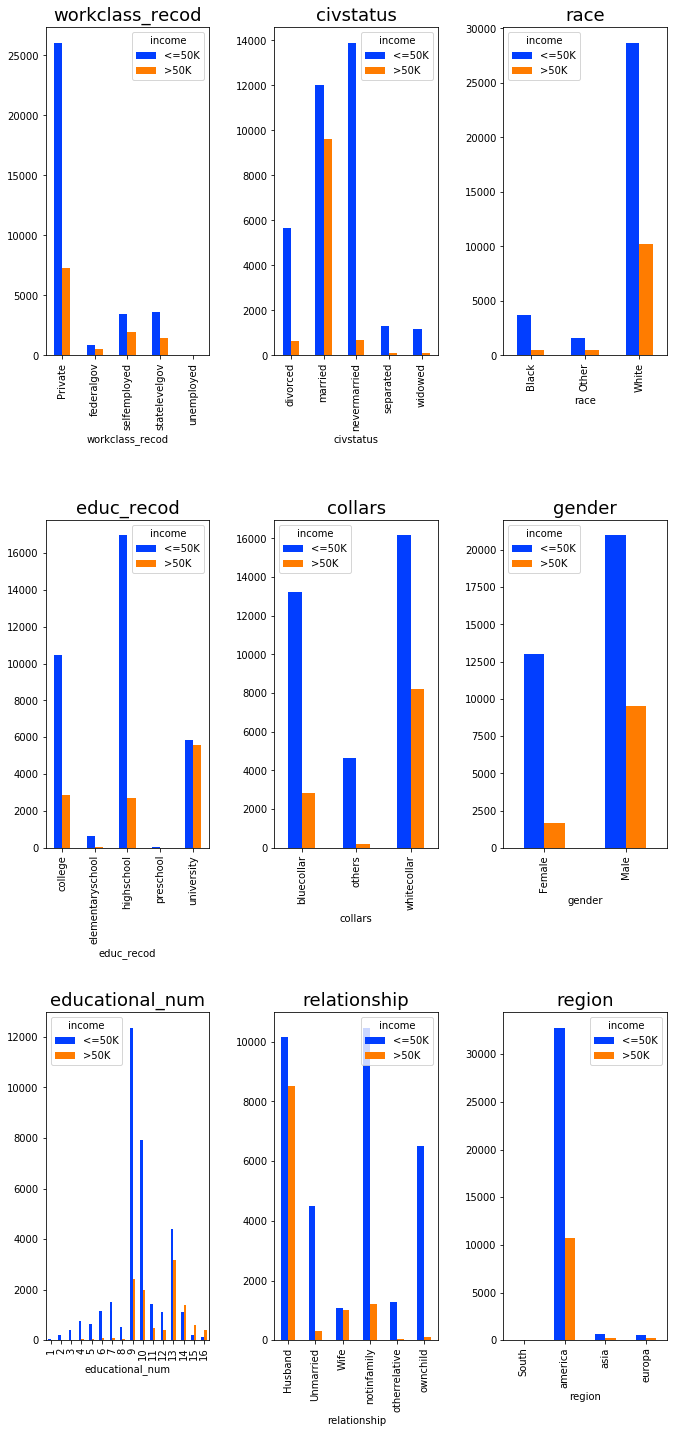

In [121]:
lista=[df2.groupby('income').workclass_recod,df2.groupby('income').educ_recod,
       df2.groupby('income').educational_num,df2.groupby('income').civstatus,
       df2.groupby('income').collars,df2.groupby('income').relationship,
       df2.groupby('income').race,df2.groupby('income').gender,
       df2.groupby('income').region]
var=["workclass_recod","educ_recod","educational_num","civstatus","collars","relationship","race","gender","region"]
fig, axarr = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(wspace=0.4,right = 0.7,bottom = -1.4,hspace = 0.5)
j=0
k=0
for i,n in enumerate(lista):
    #plot.subplot(3,3,i+1)
    lista[i].value_counts().unstack(0).plot.bar(ax=axarr[j][k])
    axarr[j][k].set_title(var[i], fontsize=18)
    j+=1
    if j==3:
        k+=1
        j=0
        if k==3:
            k=0
            j=0

- Los gráficos muestran cierto desbalance de clases principalmente en `workclass`,`race`,`region`.
- A partir de este último gráfico, podemos decir que, el peso de la clase __America__, es muy superior al resto, Esto podría generar que el modelo sea mejor evaluado para establecer una relación con `income`, respecto las otras clases de esta variable.
- En términos generales podemos decir que:
   * La gran mayoría trabaja en el ámbito privado.
   * Estan casados
   * Son de raza blanca
   * Su nivel educativo es Hs-Grade
   * Su Ocupación es White collars
   * Son Hombres
   * Nivel de Education_num es 9-10
   * Son esposos
   * Pertenecen a America

Finalmente relacionamos la __naturaleza de la organización__, __la edad__ y el __sexo__ de la persona.

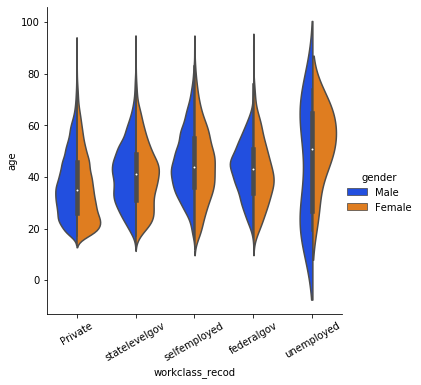

In [122]:
g=sns.catplot(x="workclass_recod", y="age", hue="gender",kind="violin", split=True, data=df2);
g.set_xticklabels(rotation=30)

- Se aprecia que la mediana de las edades para personas que trabajan independientes, es levemenete superior a las que trabajan para el gobierno federal.
- Las personas desempleadas abarcan una mayor region respecto al grupo etario. Esto es basicamente a que personas menores de edad o en edad de jubilación, se encontrara sin empleo.
- La mediana de las edades de las personas que trabajan en el ámbito privado es inferior al resto de las clases. 

# Prueba Hito 3(Parte III)
Autor: Pablo Veloz M.

## __Completar el punto de Modelación descriptiva.__
* Elementos a considerar en éste hito:
    * La modelación mediante regresión de ambos problemas. (2 puntos)
    * La interpretación de los principales regresores en cada problema. (2 puntos)
    * La definición de las estrategias de Modelación predictiva. (1 punto)
    * Entregable:  Dos notebooks (uno  por  enunciado) con todos los  puntos detallados einterpretados. De  ser  necesario, un  archivo con  extensión .py  con  todas las  funcionesimplementadas.

### Comenzaremos con las librerias a utilizar:

In [123]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import factor_analyzer as factor
import missingno as msngo

## Comprobando, datos peridos en la variable `df2`

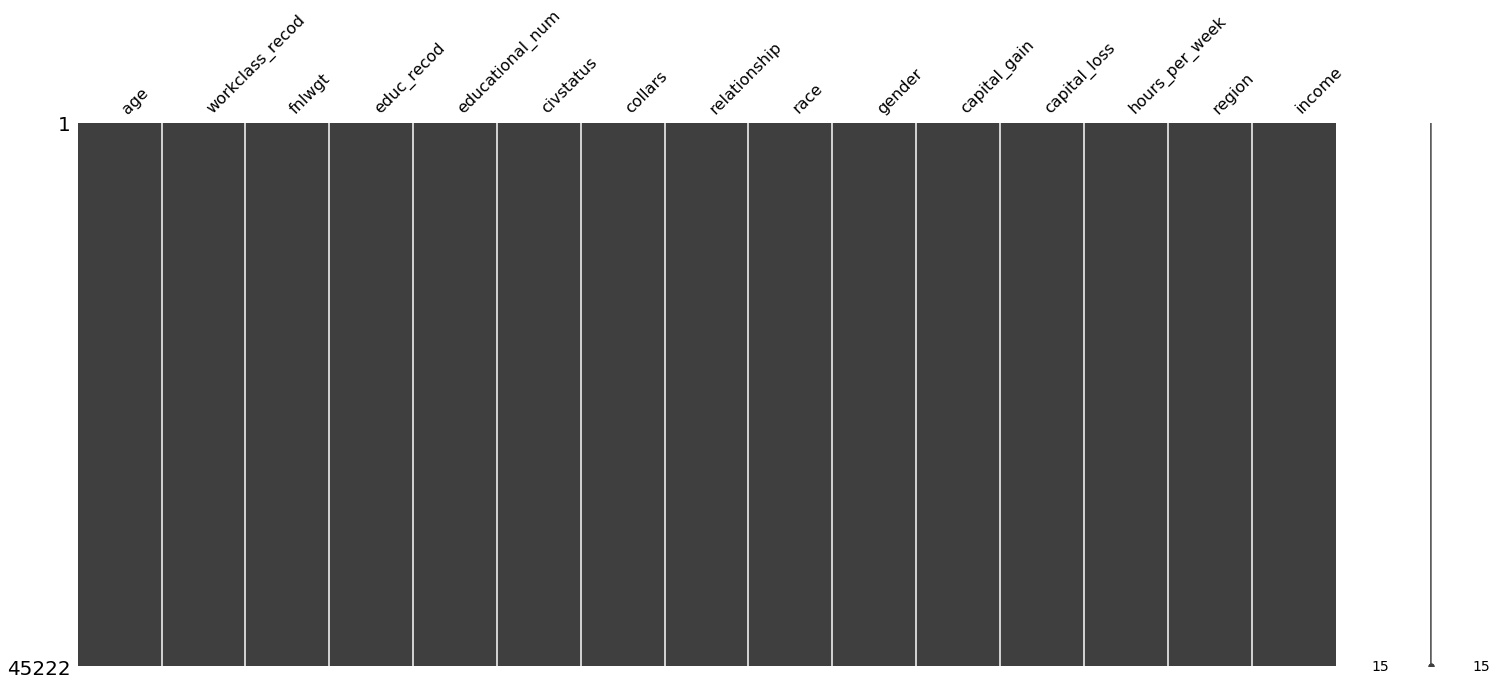

In [124]:
msngo.matrix(df2)

In [125]:
print('Porcentaje total de datos del nuevo DataFrame: {}%'.format(round(100*(45222/48842.0),2)))

Porcentaje total de datos del nuevo DataFrame: 92.59%


### __Binarización del DataFrame__

In [126]:
df2_dummy=df2.copy()
df2_dummy.columns
df2_dummy.dtypes

age                 int64
workclass_recod    object
fnlwgt              int64
educ_recod         object
educational_num     int64
civstatus          object
collars            object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
region             object
income             object
dtype: object

In [127]:
var_cat_bin=["workclass_recod","educ_recod","civstatus","collars","relationship","race","gender","region","income"]
for i in var_cat_bin:
    df2_dummy = pd.get_dummies(df2_dummy, columns=[i],drop_first=True)

## DataFrame Binarizado

In [128]:
df2_dummy=df2_dummy.rename(columns = {'income_>50K':'income'})
df2_dummy.head(3)

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,workclass_recod_federalgov,workclass_recod_selfemployed,workclass_recod_statelevelgov,workclass_recod_unemployed,...,relationship_notinfamily,relationship_otherrelative,relationship_ownchild,race_Other,race_White,gender_Male,region_america,region_asia,region_europa,income
0,25,226802,7,0,0,40,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,1,1,1,0,0,1


In [129]:
for i in df2_dummy.columns:
    print (i)

age
fnlwgt
educational_num
capital_gain
capital_loss
hours_per_week
workclass_recod_federalgov
workclass_recod_selfemployed
workclass_recod_statelevelgov
workclass_recod_unemployed
educ_recod_elementaryschool
educ_recod_highschool
educ_recod_preschool
educ_recod_university
civstatus_married
civstatus_nevermarried
civstatus_separated
civstatus_widowed
collars_others
collars_whitecollar
relationship_Unmarried
relationship_Wife
relationship_notinfamily
relationship_otherrelative
relationship_ownchild
race_Other
race_White
gender_Male
region_america
region_asia
region_europa
income


## __Correlaciones Numéricas__

In [130]:
var_num=[]
for i in df2_dummy.columns:
    if i=="income":
        pass
    elif df2_dummy[i].dtype=='int64':
        var_num.append(i)
print(var_num)

['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [131]:
def correlacion_numericas(dataframe,lista):
    plt.figure(figsize = (6,6))
    corr_conti = dataframe[lista]
    corr_conti=corr_conti.dropna()
    df_map_conti=corr_conti.corr()
    ax = sns.heatmap(df_map_conti,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),square=True,annot=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
    plt.title("Correlación entre Variables Númericas")


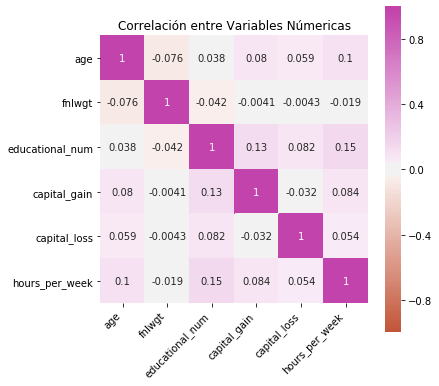

In [132]:
correlacion_numericas(df2_dummy,var_num)

### No se aprecia una correlación significa entre variables numérica.

## __Correlaciones Totales Variables Binarizadas:__

In [2]:
def total_correlaciones(df, value=0.5):
    plt.figure(figsize=(15, 6))
    M = df.corr()
    value_corr = M[((M > value) & (M < 1) | (M < -value))
                  ].dropna(axis=0, how='all').dropna(axis=1, how='all')
    ax=sns.heatmap(value_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 320, n=250),annot=True)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
    plt.title("Corralaciones Totales")

In [3]:
total_correlaciones(df2_dummy, value=0.4)

NameError: name 'df2_dummy' is not defined

## __Aspectos a resaltar:__
* ### A mayor edad menor es tener una relación con un solo hijo
* ### Una persona casada tiene una correlación -0.44 con nuestro vector objetivo.
* ### Una persona casada tiende a ser Hombre
* ### Quizas sea trivial, pero hay alta correlación de pertenecer a Asia y ser de raza asian, como también no ser de America. O pertenecer a la región de Asia y no ser Negro. 


## __Modelación:__
### Como el vector objetivo `income` es de tipo binaria, la modelación se basa en un modelo de clasificación, por lo tanto:

## Creando un string para incorporar todas las variables en relación a `income`

### m1_logit = smf.logit(<font color='red' >string_cols</font>,data=df2_dummy).fit()
### y generar un m1_logit.summary()

In [135]:
string_cols="income~"
largo=len(df2_dummy.columns)
for i,n in enumerate(df2_dummy.columns):
    if n=="income":
        pass
    else:
        if i!=largo-2:
            string_cols+=n+"+"
        
        else:
            string_cols+=n
print(string_cols)


income~age+fnlwgt+educational_num+capital_gain+capital_loss+hours_per_week+workclass_recod_federalgov+workclass_recod_selfemployed+workclass_recod_statelevelgov+workclass_recod_unemployed+educ_recod_elementaryschool+educ_recod_highschool+educ_recod_preschool+educ_recod_university+civstatus_married+civstatus_nevermarried+civstatus_separated+civstatus_widowed+collars_others+collars_whitecollar+relationship_Unmarried+relationship_Wife+relationship_notinfamily+relationship_otherrelative+relationship_ownchild+race_Other+race_White+gender_Male+region_america+region_asia+region_europa


# Modelo 1 - "Saturado"

In [136]:
df2_dummy.columns

Index(['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_recod_federalgov',
       'workclass_recod_selfemployed', 'workclass_recod_statelevelgov',
       'workclass_recod_unemployed', 'educ_recod_elementaryschool',
       'educ_recod_highschool', 'educ_recod_preschool',
       'educ_recod_university', 'civstatus_married', 'civstatus_nevermarried',
       'civstatus_separated', 'civstatus_widowed', 'collars_others',
       'collars_whitecollar', 'relationship_Unmarried', 'relationship_Wife',
       'relationship_notinfamily', 'relationship_otherrelative',
       'relationship_ownchild', 'race_Other', 'race_White', 'gender_Male',
       'region_america', 'region_asia', 'region_europa', 'income'],
      dtype='object')

In [137]:
m1_logit = smf.logit(string_cols,data=df2_dummy).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.331730
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45190
Method:                           MLE   Df Model:                           31
Date:                Thu, 15 Aug 2019   Pseudo R-squ.:                  0.4076
Time:                        14:47:57   Log-Likelihood:                -15001.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -9.0466      0.452    -20.025      0.000      -9.932      -8.161
age                               0.0254      0.001     18.786      0.000       0.023       0.028
fnlwgt                         7.365e-07    1.4e-07      5.264      0.000    4.62e-07    1.01e-06
educational_num                   0.2776      0.016     17.313      0.000       0.246       0.309
capital_gain                      0.0003   8.61e-06     36.846      0.000       0.000       0.000
capital_loss                      0.0007   3.08e-05     21.316      0.000       0.001       0.001
hours_per_week                    0.0297      0.001     22.500      0.000       0.027       0.032
workclass_recod_federalgov        0.4427      0.075      5.910      0.000       0.296       0.589
workclass_recod_selfemployed     -0.3393      0.042     -8.025      0.000      -0.422      -0.256
workclass_recod_statelevelgov    -0.0777      0.046     -1.694      0.090      -0.168       0.012
workclass_recod_unemployed       -1.1037      0.800     -1.379      0.168      -2.672       0.465
educ_recod_elementaryschool       0.1419      0.237      0.598      0.550      -0.323       0.607
educ_recod_highschool            -0.0636      0.047     -1.361      0.173      -0.155       0.028
educ_recod_preschool             -3.9595      4.033     -0.982      0.326     -11.865       3.946
educ_recod_university             0.0880      0.061      1.448      0.148      -0.031       0.207
civstatus_married                 0.8003      0.138      5.786      0.000       0.529       1.071
civstatus_nevermarried           -0.4836      0.072     -6.696      0.000      -0.625      -0.342
civstatus_separated              -0.0290      0.133     -0.218      0.827      -0.290       0.232
civstatus_widowed                 0.0899      0.128      0.703      0.482      -0.161       0.341
collars_others                   -0.7270      0.087     -8.370      0.000      -0.897      -0.557
collars_whitecollar               0.6034      0.035     17.064      0.000       0.534       0.673
relationship_Unmarried           -1.1990      0.150     -7.981      0.000      -1.493      -0.905
relationship_Wife                 1.0592      0.084     12.590      0.000       0.894       1.224
relationship_notinfamily         -0.9684      0.134     -7.236      0.000      -1.231      -0.706
relationship_otherrelative       -1.4217      0.187     -7.595      0.000      -1.789      -1.055
relationship_ownchild            -1.9374      0.166    -11.650      0.000      -2.263      -1.611
race_Other                        0.1782      0.113      1.583      0.114      -0.042       0.399
race_White                        0.2427      0.063      3.855      0.000       0.119       0.366
gender_Male                       0.7799      0.064     12.131      0.000       0.654       0.906
region_america                    1.0920      0.370      2.953      0.003       0.367       1.817
region_

In [138]:
def pvalues_significantes(model,tipo):
    pvalues = model.pvalues[1:]
    if tipo==False:
        return pvalues[pvalues >= 0.025]
    else:
        return pvalues[pvalues < 0.025]

### Las variables regresoras __no__ significativas al 95% corresponden a:


In [139]:
pvalues_significantes(m1_logit,False)

workclass_recod_statelevelgov    0.090269
workclass_recod_unemployed       0.167840
educ_recod_elementaryschool      0.549516
educ_recod_highschool            0.173364
educ_recod_preschool             0.326249
educ_recod_university            0.147560
civstatus_separated              0.827179
civstatus_widowed                0.482276
race_Other                       0.113504
dtype: float64

## __Modelo 2__ - "No-Saturado"

### Se realizará un segundo Modelo con regresores significativos, a saber:

In [140]:
pvalues_significantes(m1_logit,True)

age                              9.740700e-79
fnlwgt                           1.407099e-07
educational_num                  3.738087e-67
capital_gain                    3.371209e-297
capital_loss                    8.065481e-101
hours_per_week                  4.133608e-112
workclass_recod_federalgov       3.414380e-09
workclass_recod_selfemployed     1.013201e-15
civstatus_married                7.192358e-09
civstatus_nevermarried           2.142565e-11
collars_others                   5.761773e-17
collars_whitecollar              2.763828e-65
relationship_Unmarried           1.457108e-15
relationship_Wife                2.399835e-36
relationship_notinfamily         4.614289e-13
relationship_otherrelative       3.079325e-14
relationship_ownchild            2.289738e-31
race_White                       1.155204e-04
gender_Male                      7.230444e-34
region_america                   3.150076e-03
region_asia                      9.696258e-03
region_europa                    7

In [141]:
listado=pvalues_significantes(m1_logit,True).index

In [142]:
string_cols="income~"
largo=len(listado)
for i,n in enumerate(listado):
    if n=="income":
        pass
    else:
        if i!=largo-1:
            string_cols+=n+"+"
        
        else:
            string_cols+=n
print(string_cols)

income~age+fnlwgt+educational_num+capital_gain+capital_loss+hours_per_week+workclass_recod_federalgov+workclass_recod_selfemployed+civstatus_married+civstatus_nevermarried+collars_others+collars_whitecollar+relationship_Unmarried+relationship_Wife+relationship_notinfamily+relationship_otherrelative+relationship_ownchild+race_White+gender_Male+region_america+region_asia+region_europa


In [143]:
m2_logit = smf.logit(string_cols,data=df2_dummy).fit()
m2_logit.summary()

Optimization terminated successfully.
         Current function value: 0.331910
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45199
Method:                           MLE   Df Model:                           22
Date:                Thu, 15 Aug 2019   Pseudo R-squ.:                  0.4073
Time:                        14:47:58   Log-Likelihood:                -15010.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -9.0914      0.408    -22.270      0.000      -9.892      -8.291
age                              0.0253      0.001     19.015      0.000       0.023       0.028
fnlwgt                        7.165e-07   1.39e-07      5.161      0.000    4.44e-07    9.89e-07
educational_num                  0.2984      0.007     41.594      0.000       0.284       0.312
capital_gain                     0.0003   8.59e-06     36.877      0.000       0.000       0.000
capital_loss                     0.0007   3.08e-05     21.341      0.000       0.001       0.001
hours_per_week                   0.0297      0.001     22.506      0.000       0.027       0.032
workclass_recod_federalgov       0.4526      0.074      6.088      0.000       0.307       0.598
workclass_recod_selfemployed    -0.3267      0.042     -7.850      0.000      -0.408      -0.245
civstatus_married                0.8027      0.136      5.904      0.000       0.536       1.069
civstatus_nevermarried          -0.4837      0.068     -7.073      0.000      -0.618      -0.350
collars_others                  -0.7252      0.087     -8.352      0.000      -0.895      -0.555
collars_whitecollar              0.6153      0.035     17.564      0.000       0.547       0.684
relationship_Unmarried          -1.1968      0.150     -7.971      0.000      -1.491      -0.902
relationship_Wife                1.0524      0.084     12.557      0.000       0.888       1.217
relationship_notinfamily        -0.9598      0.134     -7.181      0.000      -1.222      -0.698
relationship_otherrelative      -1.4144      0.187     -7.555      0.000      -1.781      -1.047
relationship_ownchild           -1.9307      0.166    -11.631      0.000      -2.256      -1.605
race_White                       0.1963      0.053      3.675      0.000       0.092       0.301
gender_Male                      0.7824      0.064     12.267      0.000       0.657       0.907
region_america                   0.9490      0.361      2.631      0.009       0.242       1.656
region_asia                      0.9352      0.370      2.527      0.012       0.210       1.661
region_europa                    1.1658      0.376      3.103      0.002       0.429       1.902
================================================================================================
"""

### __Analisis de Modelos.__
- Date: Wed, 14 Aug 2019 , Time: 	18:29:35
- __Métricas Comparativas__

<table class="egt">
  <tr>
    <th scope="row"></th>
    <th>R-squared</th>
    <th>log-Likehood</th>  
  </tr>
  <tr>
    <th>Modelo 1 - G1</th>
    <td>0.4076</td>
    <td>-15001</td>
  </tr>
  <tr>
    <th>Modelo 2 - G2</th>
    <td>0.4073</td>
    <td>-15010</td>
  </tr>
  
</table> 
 
- El valor de `R2`: si consideramos que corresponde al porcentaje de variación de la variable`income` y que se explicaría a través de un modelo lineal, sabiendo que:
    - R-cuadrado siempre está entre 0 y 100%:
            - 0% indica que el modelo no explica la variabilidad de los datos de respuesta en torno a su media.
             -100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

     - En general, cuanto mayor sea el R cuadrado, mejor se ajustará el modelo a sus datos.Para este caso podemos decir que nuestros modelos tiene:
       
       - Modelo 1: 40.76% de explicación en forma lineal.
       - Modelo 2: 40.73% de explicación en forma lineal.
 
- `Log-Likelihood`: pueden usarse para comparar el ajuste de diferentes coeficientes. Debido a que desea maximizar la probabilidad de registro, el valor más alto es mejor:
       - Modelo 1:-15001
       - Modelo 2:-15010.

__Con esto, podemos señalar que el Modelo 1 presenta mejores métricas de desempeño tanto de R2 y log-likehood, considerando además que presenta una mayor cantidad de variables asociadas a vector objetivo `income`.__

### __Modelación predictiva__

### Modelo 1: Utilizando todas las variables del DataFrame

In [144]:
columnas=[]
for i in df2_dummy.columns:
    if i!="income":
        columnas.append(i)
    else:
        pass
print(columnas)
len(columnas)

['age', 'fnlwgt', 'educational_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass_recod_federalgov', 'workclass_recod_selfemployed', 'workclass_recod_statelevelgov', 'workclass_recod_unemployed', 'educ_recod_elementaryschool', 'educ_recod_highschool', 'educ_recod_preschool', 'educ_recod_university', 'civstatus_married', 'civstatus_nevermarried', 'civstatus_separated', 'civstatus_widowed', 'collars_others', 'collars_whitecollar', 'relationship_Unmarried', 'relationship_Wife', 'relationship_notinfamily', 'relationship_otherrelative', 'relationship_ownchild', 'race_Other', 'race_White', 'gender_Male', 'region_america', 'region_asia', 'region_europa']


31

In [145]:
y_vec=df2_dummy["income"]
X_mat=df2_dummy.loc[:,columnas].dropna()

X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=16123)
std_scaler=StandardScaler().fit(X_train)
data_preproc_Xtrain=std_scaler.transform(X_train)
data_preproc_Xtest=std_scaler.transform(X_test)

logistic_model=LogisticRegression().fit(data_preproc_Xtrain,y_train)
y_predict=logistic_model.predict(data_preproc_Xtest)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11134
           1       0.74      0.59      0.66      3790

    accuracy                           0.84     14924
   macro avg       0.81      0.76      0.78     14924
weighted avg       0.84      0.84      0.84     14924



In [146]:
from sklearn.metrics import confusion_matrix
random_state=16123
confusion_matrix = confusion_matrix(y_test, y_predict)
print("Matrix de Confusión:\n",confusion_matrix)

Matrix de Confusión:
 [[10357   777]
 [ 1553  2237]]


- De las Matriz de confusión podemos concluir que:
    * __True positive__: 10357 (Predijimos un resultado positivo y fue positivo)
    * __True negative__: 2237 (Predijimos un resultado negativo y fue negativo)
    * __False positive__: 777 (Predijimos un resultado positivo y resulto negativo)
    * __False negative__: 1553 (Predijimos un resultado negativo y resulto positivo)

Los resultados nos dicen que:
* 10357+2237=12594 Predicciones Correctas. 
* 1553+777=2330 Predicciones Incorrectas.

Y apartir del `reporte de clasificacion` podemos decir que el modelo tiene un __84%__ de `Presición`.

### Modelo 2: Utilizando todas las variables p_values significativas.


In [147]:
y_vec=df2_dummy["income"]
X_mat=df2_dummy.loc[:,listado].dropna()

X_train,X_test,y_train,y_test=train_test_split(X_mat,y_vec,test_size=0.33,random_state=161239)
std_scaler=StandardScaler().fit(X_train)
data_preproc_Xtrain=std_scaler.transform(X_train)
data_preproc_Xtest=std_scaler.transform(X_test)

logistic_model=LogisticRegression().fit(data_preproc_Xtrain,y_train)
y_predict=logistic_model.predict(data_preproc_Xtest)



In [148]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11189
           1       0.73      0.60      0.65      3735

    accuracy                           0.84     14924
   macro avg       0.80      0.76      0.78     14924
weighted avg       0.84      0.84      0.84     14924



In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print("Matrix de Confusión:\n",confusion_matrix)

Matrix de Confusión:
 [[10354   835]
 [ 1510  2225]]


### Los resultados nos dicen que:
    * 10354+2225=12579 correct predictions 
    * 1510+835=2345 incorrect predictions.

### Curva Receiver Operator Characteristic.

probabilidades:  [0.02774237 0.00145677 0.00664655 ... 0.01103052 0.00080343 0.07615755]


Text(0.5, 0, 'Falsos posivitos')

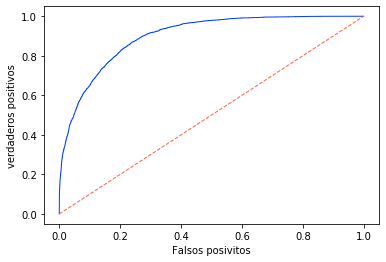

In [150]:
yhat_pr= logistic_model.predict_proba(data_preproc_Xtest)[:,1]
print("probabilidades: ",yhat_pr)
false_positive,true_positive,threshold = roc_curve(y_test,yhat_pr)
plt.plot(false_positive,true_positive,lw=1)
plt.plot([0,1],linestyle="--",lw=1,color="tomato")
plt.ylabel("verdaderos positivos")
plt.xlabel("Falsos posivitos")

In [151]:
auc=roc_auc_score(y_test,yhat_pr)
print("AUC: ",auc)
print("Desempeño del modelo: ",auc-0.5)

AUC:  0.898500236235555
Desempeño del modelo:  0.39850023623555497


__Analisis:__ 
    - Esto significa que nuestro modelo es .39 superior en comparación a un modelo aleatorio cara-sello